In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [171]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [172]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [173]:
print("Train dataset columns:", train_df.columns)
print("Test dataset columns:", test_df.columns)
train_df.columns = train_df.columns.str.strip()
target_column = 'yield'  


Train dataset columns: Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')
Test dataset columns: Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')


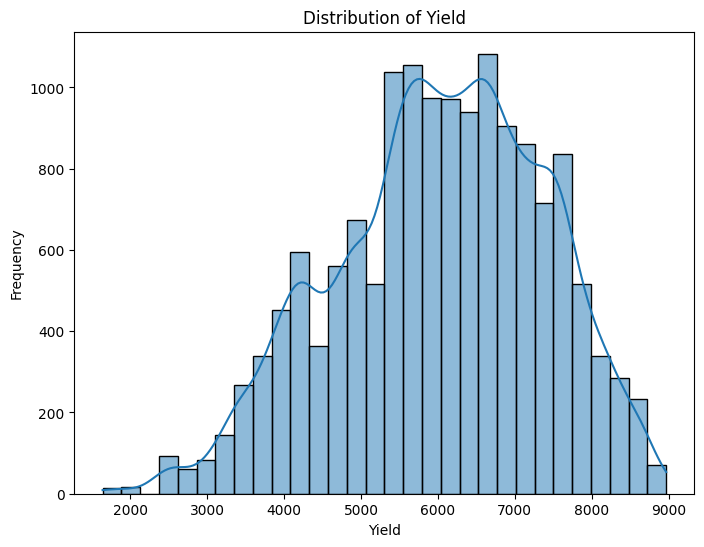

In [174]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df[target_column], kde=True, bins=30)
plt.title(f"Distribution of {target_column.capitalize()}")
plt.xlabel(target_column.capitalize())
plt.ylabel("Frequency")
plt.show()

In [175]:
print("\nData Info:")
train_df.info()



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitse

In [176]:
print("\nStatistical Summary:")
print(train_df.describe())



Statistical Summary:
                 id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000    427.577533     19.773500      0.388500      0.284573   
std     4330.271354    214.127422      6.644451      0.390162      0.058855   
min        0.000000      0.000000     10.000000      0.000000      0.000000   
25%     3749.750000    247.000000     12.500000      0.250000      0.250000   
50%     7499.500000    469.000000     25.000000      0.500000      0.250000   
75%    11249.250000    598.000000     25.000000      0.500000      0.380000   
max    14999.000000    777.000000     40.000000     18.430000      0.585000   

            andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  15000.000000  15000.000000      15000.000000      15000.000000   
mean       0.486751      0.591612         82.245667         49.719033   
std        0.147560      0.144194          9.10

### Unique qiymatlarini korib chiqamiz

In [177]:
print("\nUnique Values per Column:")
unique_values = train_df.nunique()
print(unique_values)



Unique Values per Column:
id                      15000
Row#                      776
clonesize                   6
honeybee                    7
bumbles                     9
andrena                    10
osmia                      13
MaxOfUpperTRange            6
MinOfUpperTRange            7
AverageOfUpperTRange        6
MaxOfLowerTRange            5
MinOfLowerTRange            5
AverageOfLowerTRange        9
RainingDays                 5
AverageRainingDays          6
fruitset                 1084
fruitmass                1112
seeds                    1233
yield                     777
dtype: int64


### Null yoki NaN values ga tekshirib koramiz


In [178]:
print("\nNull Values per Column:")
null_values = train_df.isnull().sum()
print(null_values)



Null Values per Column:
id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


Ko'rinib turganidek, bizdagi dataset Nan yoku null lardan clean ekan

### Correlation Matrix


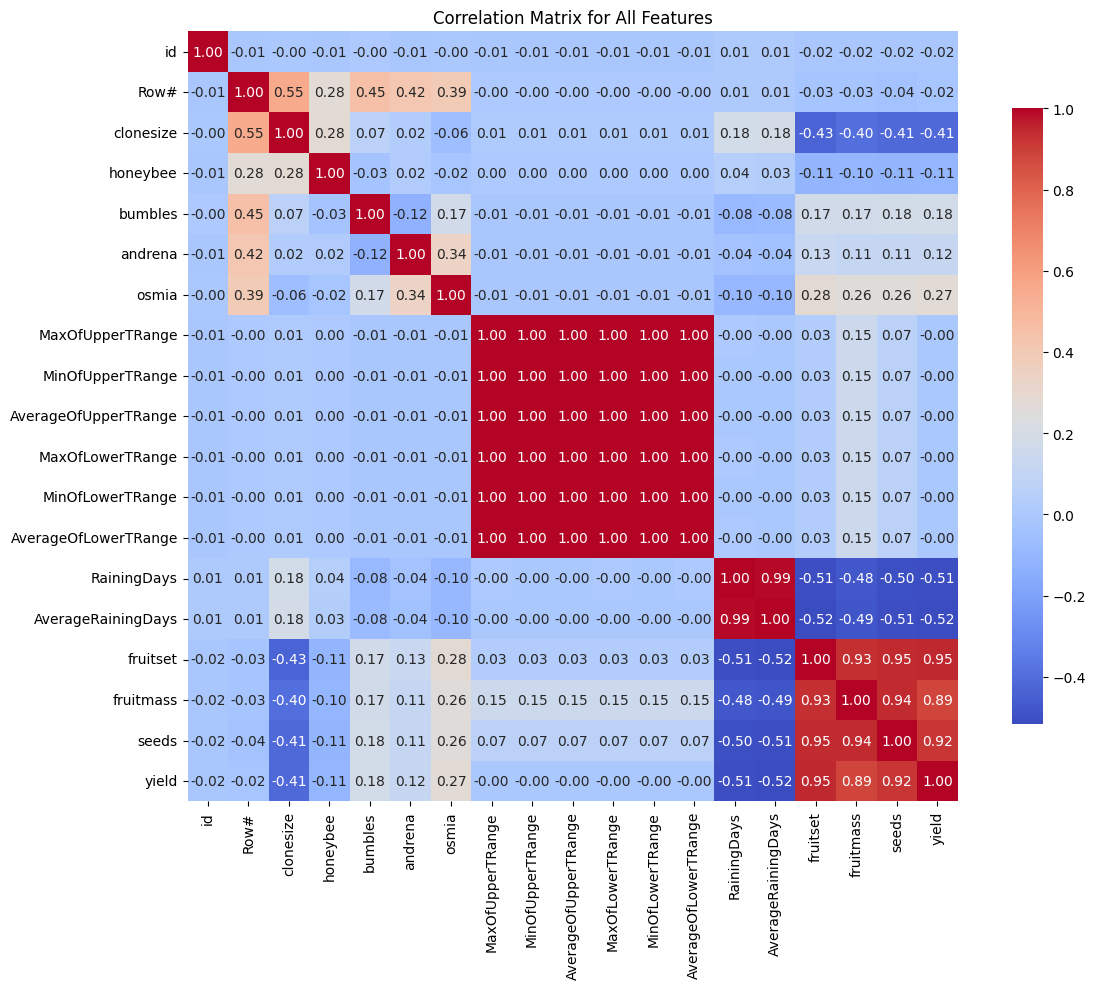


Top Features Correlated with Yield:
yield                   1.000000
fruitset                0.950373
seeds                   0.919702
fruitmass               0.886668
osmia                   0.271989
bumbles                 0.177281
andrena                 0.122463
AverageOfUpperTRange   -0.003666
AverageOfLowerTRange   -0.003878
MinOfUpperTRange       -0.004008
MaxOfLowerTRange       -0.004082
MinOfLowerTRange       -0.004109
MaxOfUpperTRange       -0.004252
id                     -0.018685
Row#                   -0.023540
honeybee               -0.107869
clonesize              -0.414196
RainingDays            -0.506675
AverageRainingDays     -0.517130
Name: yield, dtype: float64


In [179]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix for All Features")
plt.show()

print("\nTop Features Correlated with Yield:")
yield_correlation = correlation_matrix[target_column].sort_values(ascending=False)
print(yield_correlation)

Ushbu datasetda korrelyatsiya matritsasi ayniqsa `yield` (hosildorlik) targeti bilan bog‘liq munosabatlar haqida quyidagi ma’lumotlarni beradi:

1. **`yield` bilan Strong Positive Correlations**:
   - `fruitset` (korrelyatsiya ≈ 0.95), `seeds` (≈ 0.92) va `fruitmass` (≈ 0.89) `yield` bilan kuchli musbat bog‘liqlikka ega. Bu xususiyatlar `yield`ni bashorat qilish uchun juda muhim va `fruitset`, `seeds` yoki `fruitmass` o‘zgaruvchilari oshganida, `yield` ham oshishi mumkinligini anglatadi. Bu ularni model uchun juda ahamiyatli qiladi.

2. **Moderate Positive Correlations**:
   - `osmia` (≈ 0.27) va `bumbles` (≈ 0.18) `yield` bilan o‘rtacha musbat bog‘liqlikka ega. Bu shuni anglatadiki, ular ijobiy ta’sir ko‘rsatadi, lekin ta’siri `fruitset`, `seeds` va `fruitmass`ga qaraganda kamroq.

3. **`yield` bilan Negative Correlations**:
   - `RainingDays` (≈ -0.51) va `AverageRainingDays` (≈ -0.52) `yield` bilan manfiy bog‘liqlikka ega, ya’ni yomg‘irli kunlar ko‘payishi `yield`ni kamaytirishi mumkin. Bu haddan tashqari ko‘p yomg‘irning hosildorlikka salbiy ta’sir ko‘rsatishi mumkinligini aks ettirishi mumkin.

4. **Low or Negligible Correlations yani kam yoki ahamiyatsiz korrelyatsiyalar**:
   - Haroratga bog‘liq xususiyatlar (`MaxOfUpperTRange`, `MinOfUpperTRange`, va boshqalar) `yield` bilan minimal korrelyatsiyaga ega, bu harorat o‘zgarishlari ushbu datasetda `yield`ga sezilarli ta’sir ko‘rsatmasligini anglatadi.
   - `honeybee` va `clonesize` `yield` bilan zaif korrelyatsiyaga ega (-0.11 va -0.41). Bu shuni anglatadiki, ularning ta’siri katta bo‘lmasligi mumkin, lekin ular hali ham kichikroq bashoratli qiymatni ta’minlashi mumkin.

### Feature Selection and Engineering

- Ushbu korrelyatsiyalar asosida:
  - **High-correlation features** (`fruitset`, `seeds` va `fruitmass`) regressiya modeli uchun ustuvor ahamiyatga ega bo‘lishi kerak.
  - **Negative correlation features** (`RainingDays` va `AverageRainingDays`) `yield`dagi o‘zgarishlarni tushuntirishda foydali bo‘lishi mumkin.
  - **Feature Engineering**: `seeds` va `fruitmass` kabi xususiyatlarni birlashtirgan yangi xususiyatlar (masalan, nisbat yoki logarifmik o‘zgarish) yanada murakkab bog‘liqliklarni aniqlashga yordam berishi mumkin.

By using the correlation matrix, we focus on influential features for yield prediction, avoid potentially redundant variables, and guide feature engineering for a more robust regression model.






By using the correlation matrix, we focus on influential features for `yield ` prediction, avoid potentially redundant variables, and guide feature engineering for a more robust regression model.


### Barcha numric features uchun histograms


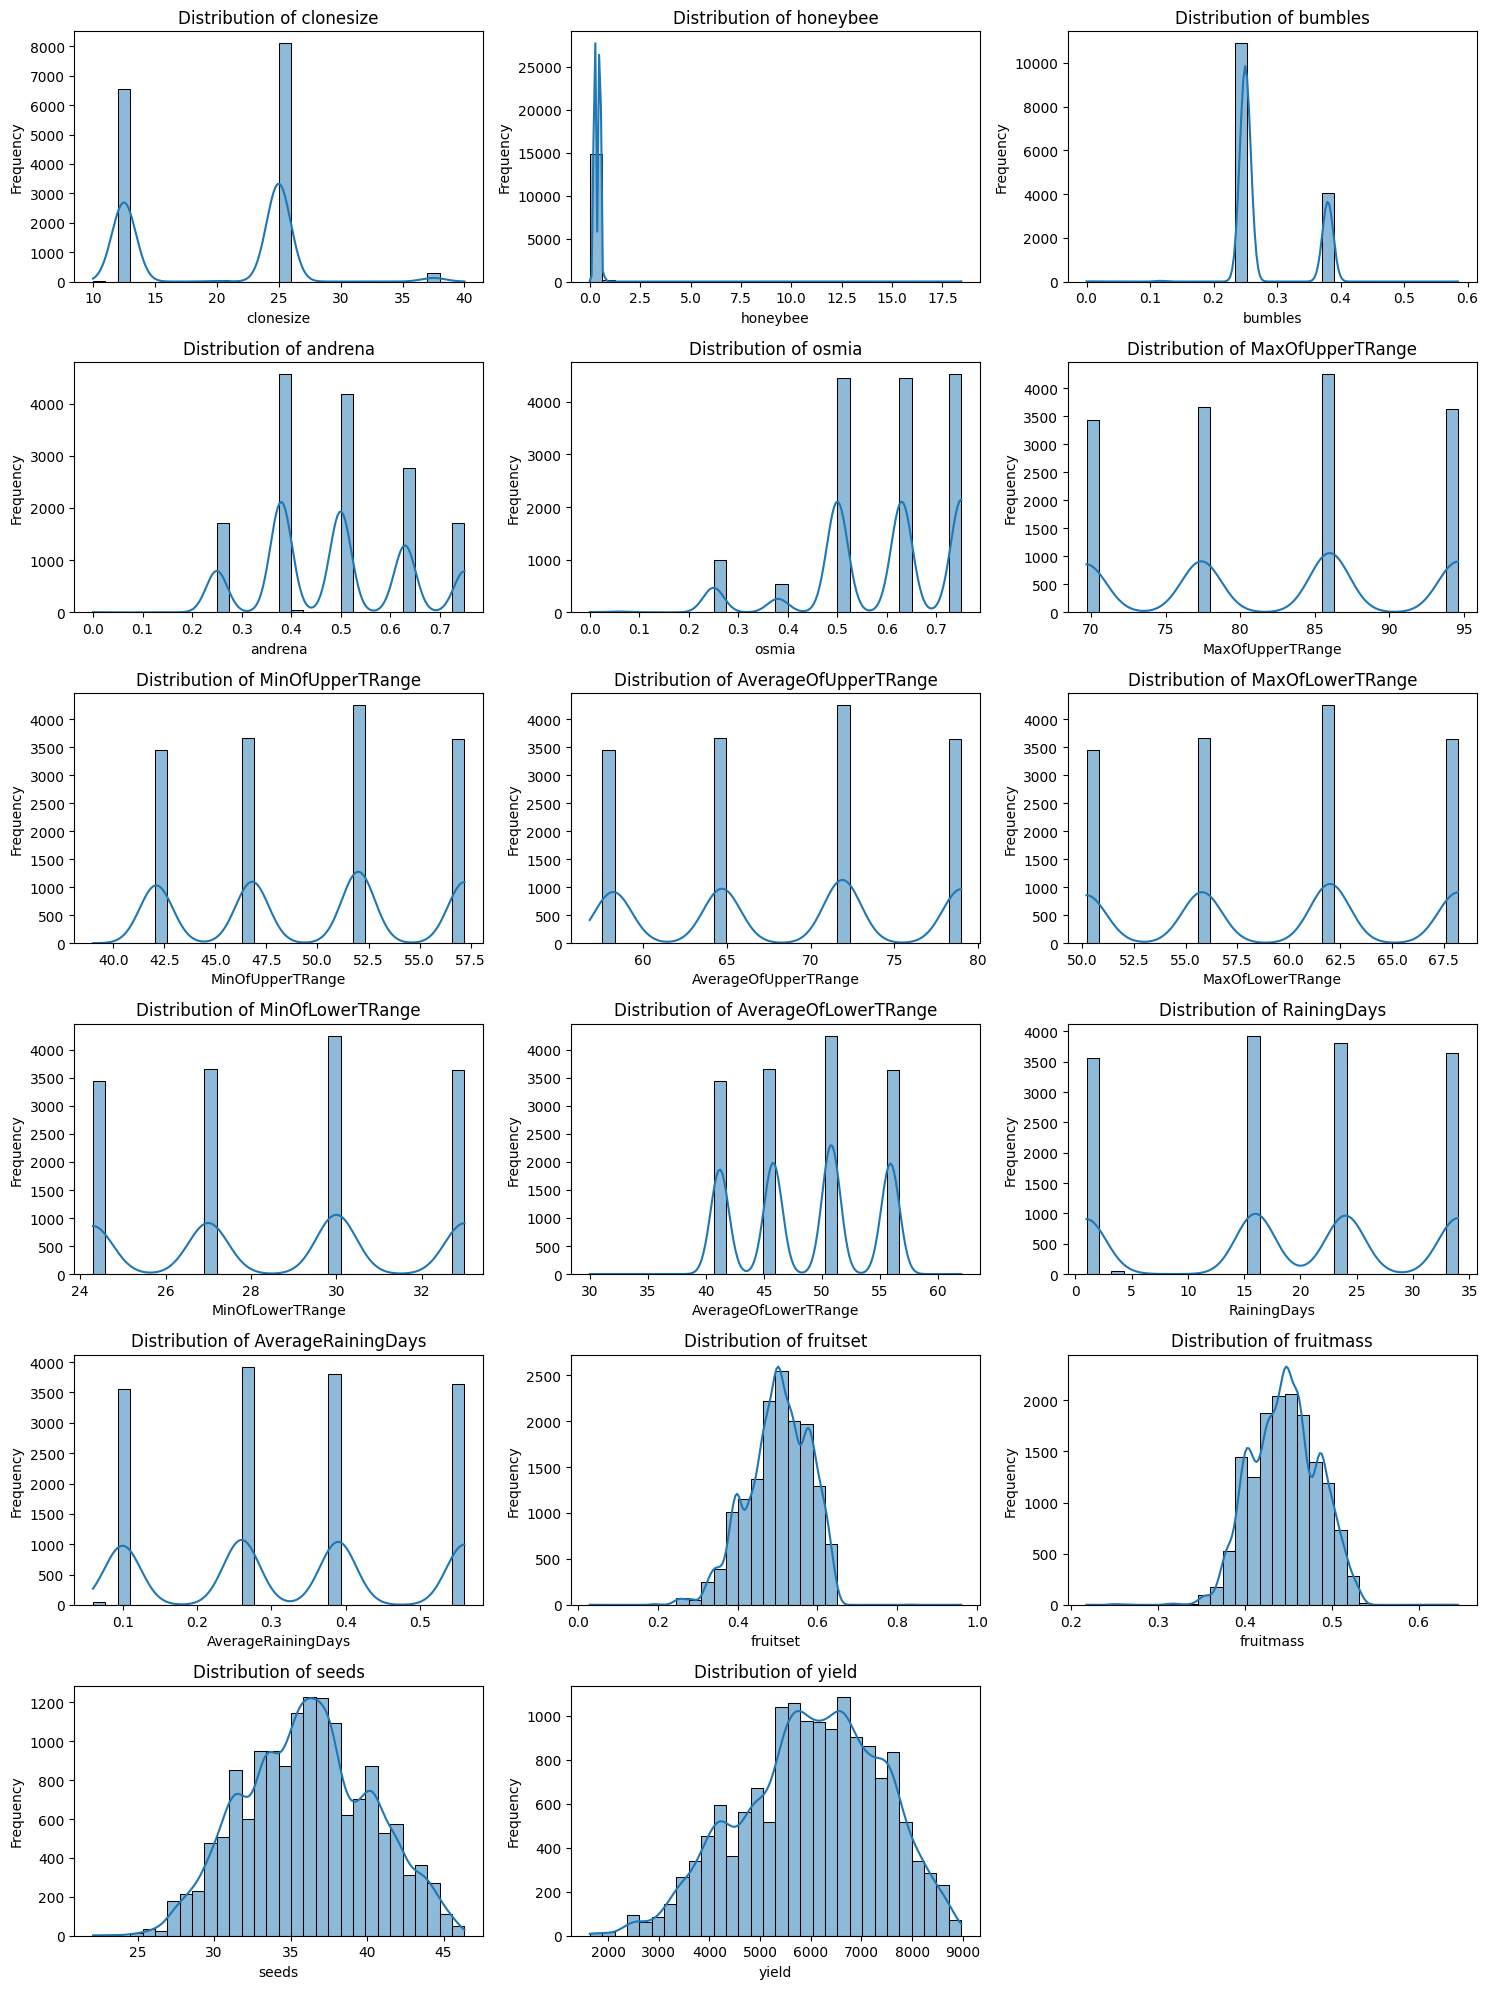

In [180]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(train_df.columns[2:], 1):
    plt.subplot(6, 3, i)
    sns.histplot(train_df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Ushbu maxsus dataset uchun gistogrammalardan kelib chiqqan holda quyidagi tushunchalar har bir xususiyatning odatiy taqsimot xususiyatlariga asoslanadi:

1. **Distribution Shape**:
   - `fruitset`, `fruitmass` va `seeds` kabi xususiyatlar, ehtimol, **uzluksiz taqsimot**ga ega bo‘lib, qiymatlari o‘rtacha diapazonda bo‘ladi.
   - `clonesize`, `honeybee`, `bumbles` va `andrena` kabi boshqa xususiyatlar esa **diskret yoki cheklangan qiymatlarga** ega bo‘lib, gistogrammada bir necha aniq ustunlardan iborat ko‘rinishi mumkin. Bular raqamli bo‘lsa-da, ko‘proq kategorik xususiyatlar sifatida ko‘rinishi mumkin.

2. **Skewness and Transformations**:
   - Ba’zi xususiyatlar, masalan `fruitmass`, **o‘ng tomonga egri** (ijobiy egri) bo‘lishi mumkin, ya’ni qiymatlar chap tomonda to‘planib, o‘ng tomonga cho‘zilgan dum mavjud.
   - Juda egri xususiyatlar uchun **logarifmik o‘zgartirish** egri taqsimotni kamaytirishga yordam beradi, bu esa, agar xususiyat taqsimoti prognozlash kuchiga ta’sir etsa, modelning ishlashini yaxshilashi mumkin.

3. **Outliers**:
   - Gistogrammada chegara qiymatlari asosiy klasterdan ancha uzoq bo‘lgan qiymatlar sifatida ko‘rinadi. Masalan, `honeybee` yoki `osmia` qiymatlari ayrim yuqori yoki past qiymatlar yaqinida keskin ko‘paygan bo‘lsa, bu chegara qiymatlari bo‘lishi mumkin.
   - Ushbu chegaraviy qiymatlarni zarur hollarda **kesish** yoki **olib tashlash** bilan ishlash maqsadga muvofiq bo‘lishi mumkin, bu esa ularning maqsadli o‘zgaruvchi (`yield`) bilan ahamiyatiga bog‘liq.

4. **Low Variability Features**:
   - **Kam o‘zgaruvchanlik**ka ega xususiyatlar o‘z qiymatlarini bir yoki ikkita ustunda to‘plagan bo‘ladi, bu esa ushbu xususiyatlarning model bashoratlariga kamroq hissa qo‘shishini anglatadi.
   - Bunday xususiyatlar `clonesize` yoki harorat diapazonlari kabi ustunlarni o‘z ichiga olishi mumkin, bu qiymatlar keng o‘zgarishlarga ega emas. Ushbu xususiyatlar maqsadli o‘zgaruvchi (`yield`) bilan bog‘liqligiga qarab olib tashlanishi yoki saqlanishi mumkin.

5. **Feature-specific Observationsr**:
   - **`fruitset`, `seeds` va `fruitmass`**: `yield` bilan yuqori korrelyatsiyaga ega ekanligi sababli, ushbu xususiyatlar ko‘proq o‘zgaruvchanlik va keng taqsimotga ega bo‘lishi ehtimoli bor.
   - **`RainingDays` va `AverageRainingDays`**: Agar bu qiymatlar tor taqsimotga ega bo‘lsa va qiymatlari pastroq raqamlarga yaqin bo‘lsa, bu shuni ko‘rsatishi mumkin-ki, aksariyat kunlar yomg‘irsiz o‘tgan va bu `yield` bilan manfiy korrelyatsiyaga ega bo‘lishi mumkin.

Har bir gistogramma ma’lumotlarni tayyorlash uchun muhim qadamlarni ko‘rsatadi, masalan, egri xususiyatlar uchun o‘zgartirishlar yoki chegara qiymatlari bilan ishlash, bu esa `yield`ni prognoz qilishda modelning aniqligi va tushunarliligini oshiradi.

### Box plot barcha numeric features outlierlarni aniqlagani


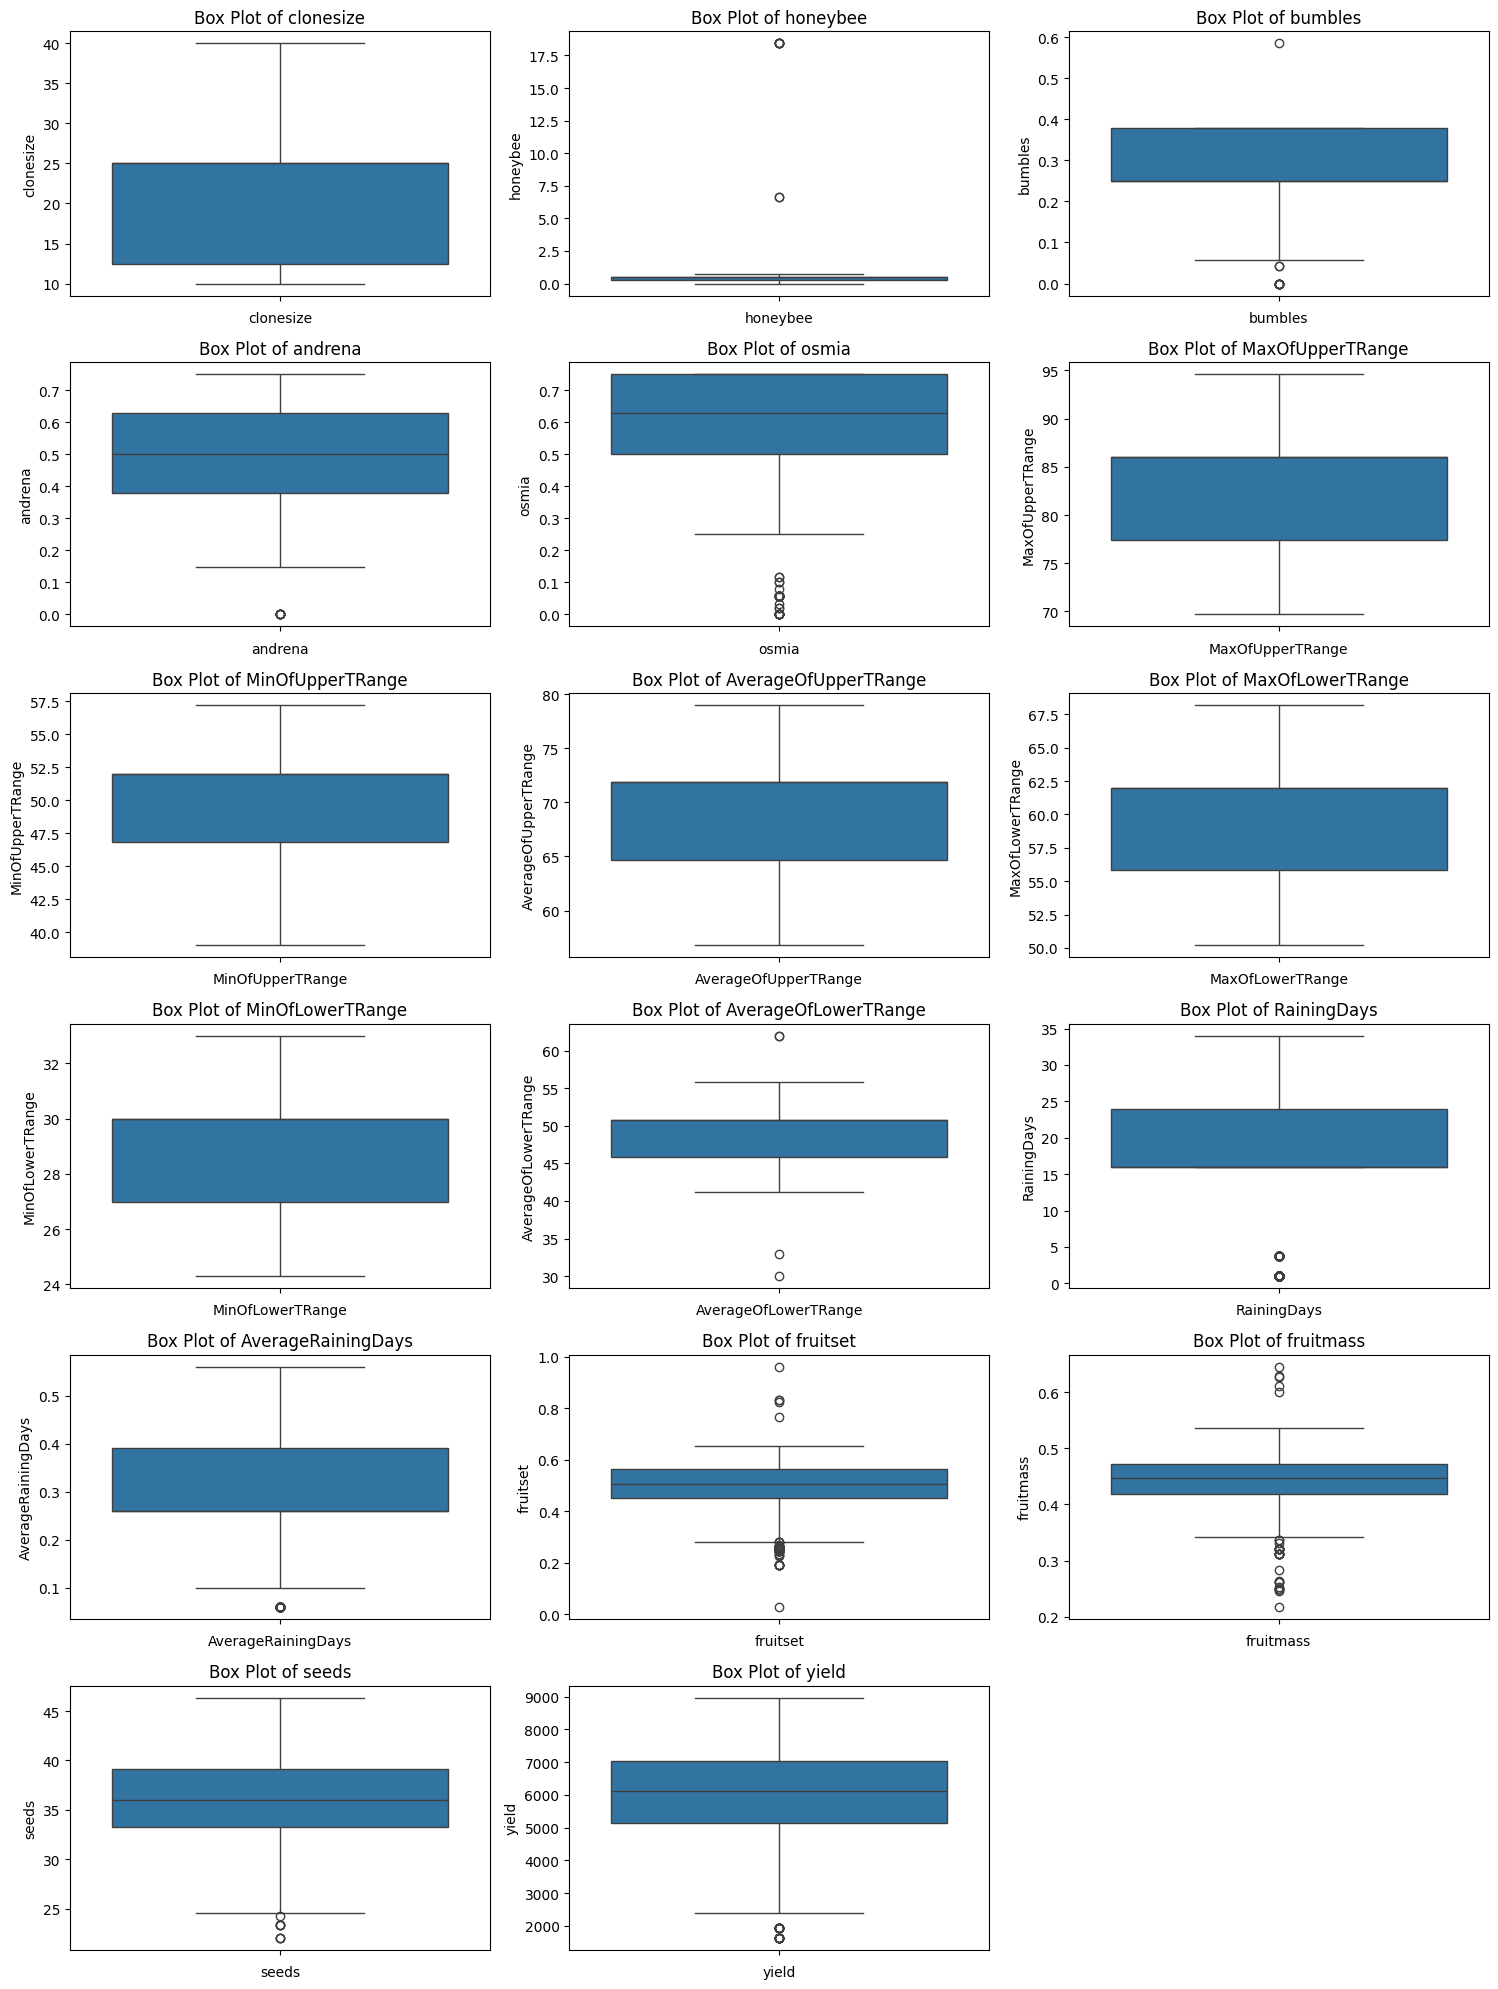

In [181]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(train_df.columns[2:], 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=train_df[column])
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()


Bizning datasetimizda ko'rinib turganday deyarli `outliers` mavjud emas dataset tahliliga katta tasir qiladigan keyinchalik

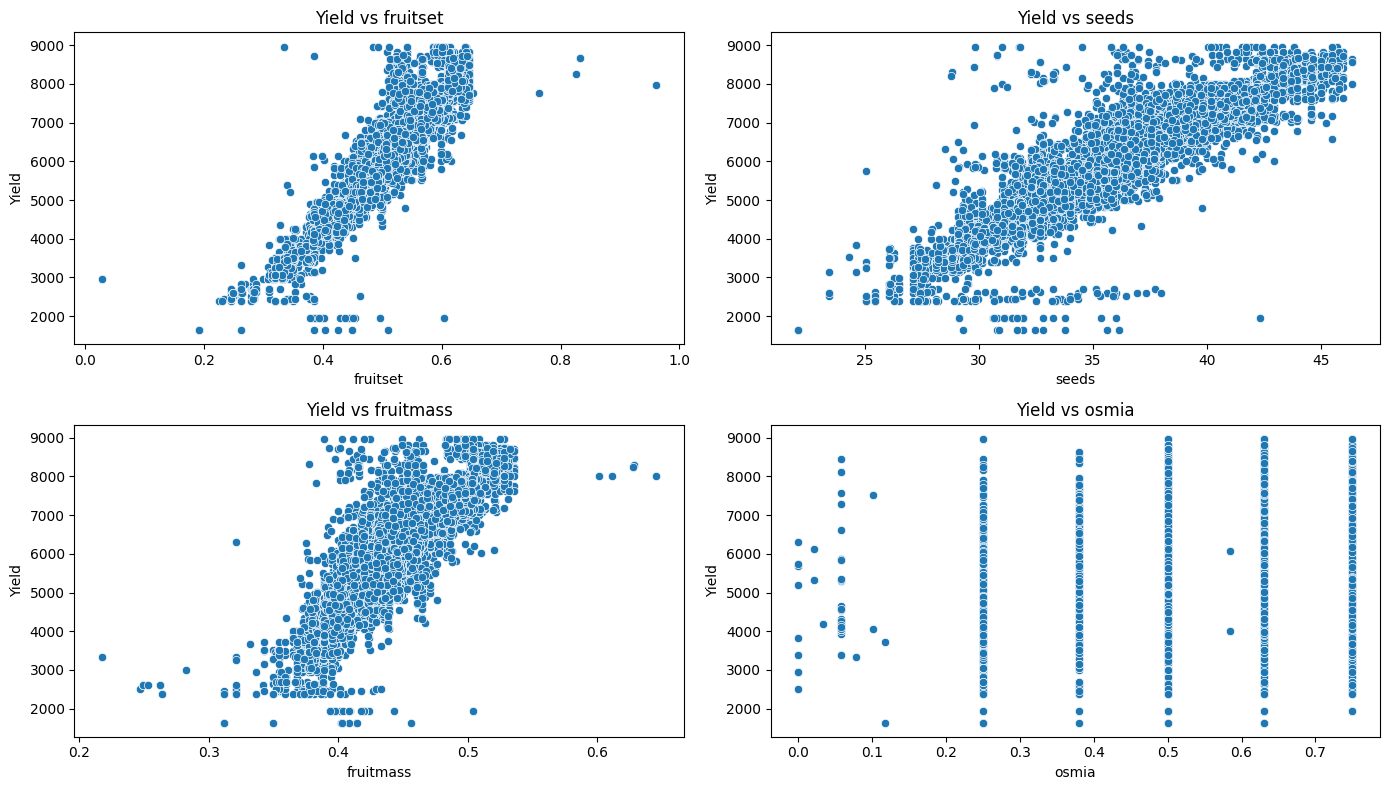

In [182]:
top_features = yield_correlation.index[1:5]  
plt.figure(figsize=(14, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=train_df[feature], y=train_df[target_column])
    plt.title(f"{target_column.capitalize()} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_column.capitalize())
plt.tight_layout()
plt.show()

`yield` va eng kuchli korrelyatsiyaga ega xususiyatlar o‘rtasidagi munosabatlarni vizual tarzda ko‘rsatadi.

### Pairplot of Selected Features -- Eng yuqori korrelyatsiyaga ega xususiyatlar va yield o‘rtasidagi juftliklar va taqsimotlarni ko‘rsatadi.

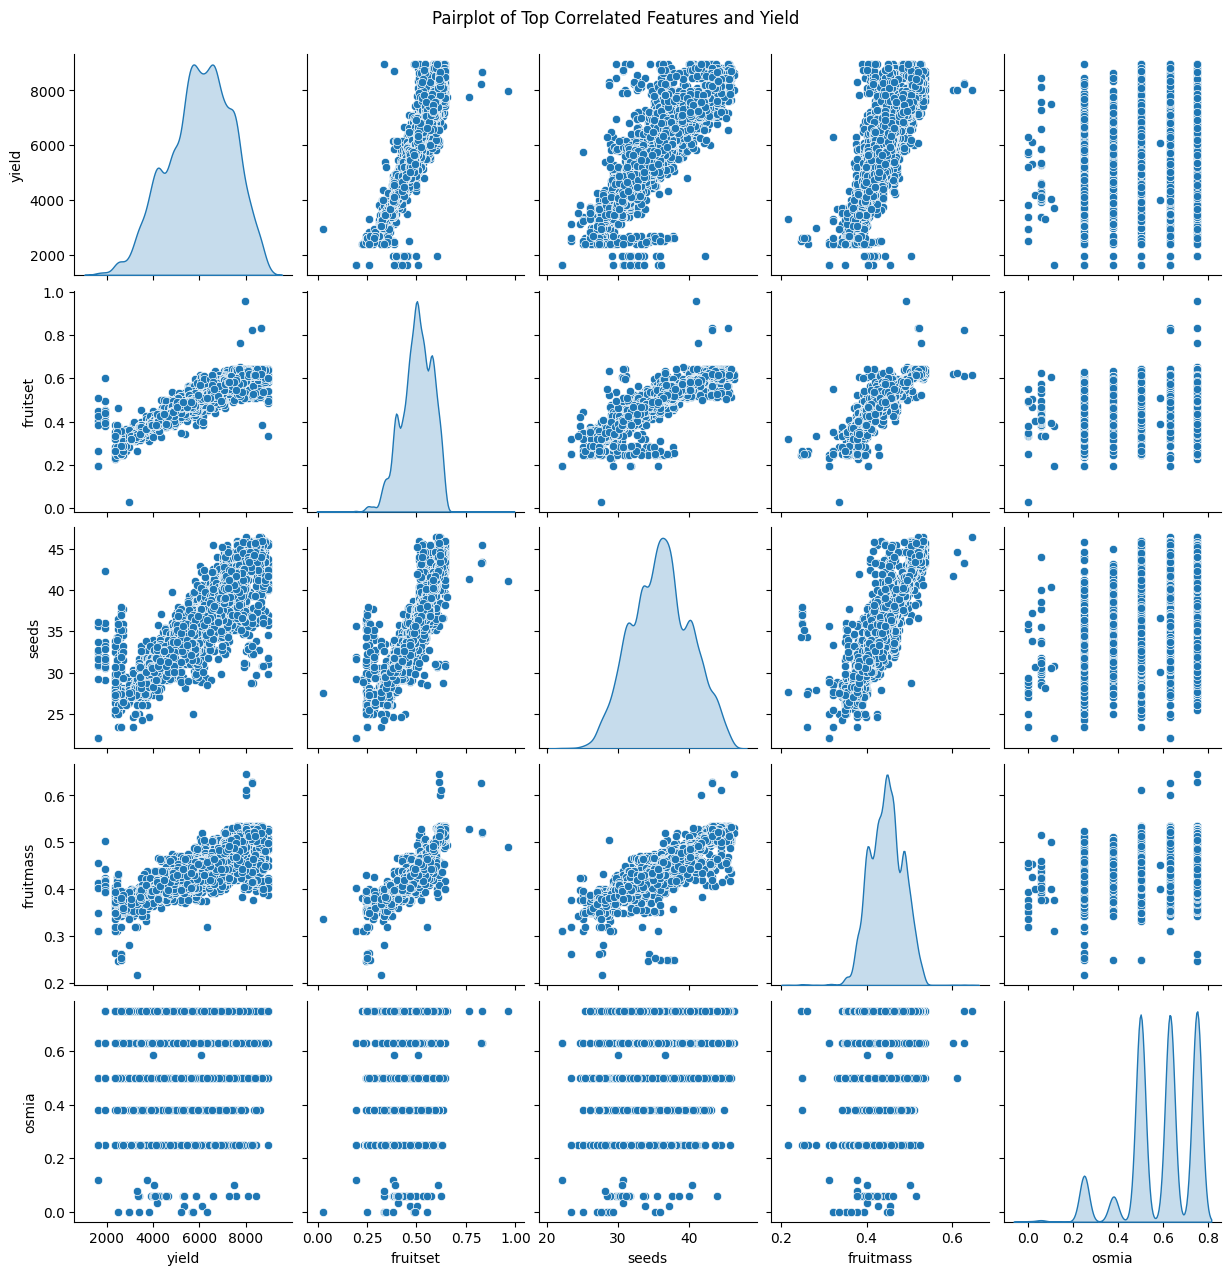

In [183]:
sns.pairplot(train_df[[target_column] + list(top_features)], diag_kind="kde")
plt.suptitle("Pairplot of Top Correlated Features and Yield", y=1.02)
plt.show()

Ushbu kod **pairplot** yaratadi, bu esa `yield` va uning eng ko‘p korrelyatsiyaga ega xususiyatlari orasidagi bog‘liqliklarni vizual tarzda ko‘rsatadi. Scatter grafiklar xususiyatlar o‘rtasidagi munosabatlarni, diagonal bo‘yicha KDE grafiklar esa har bir xususiyatning taqsimotini ko‘rsatadi. Bu `yield` uchun korrelyatsiyalar va taqsimot naqshlarini tezda baholashga yordam beradi.

### Boxplots for Categorical-like Features vs Yield

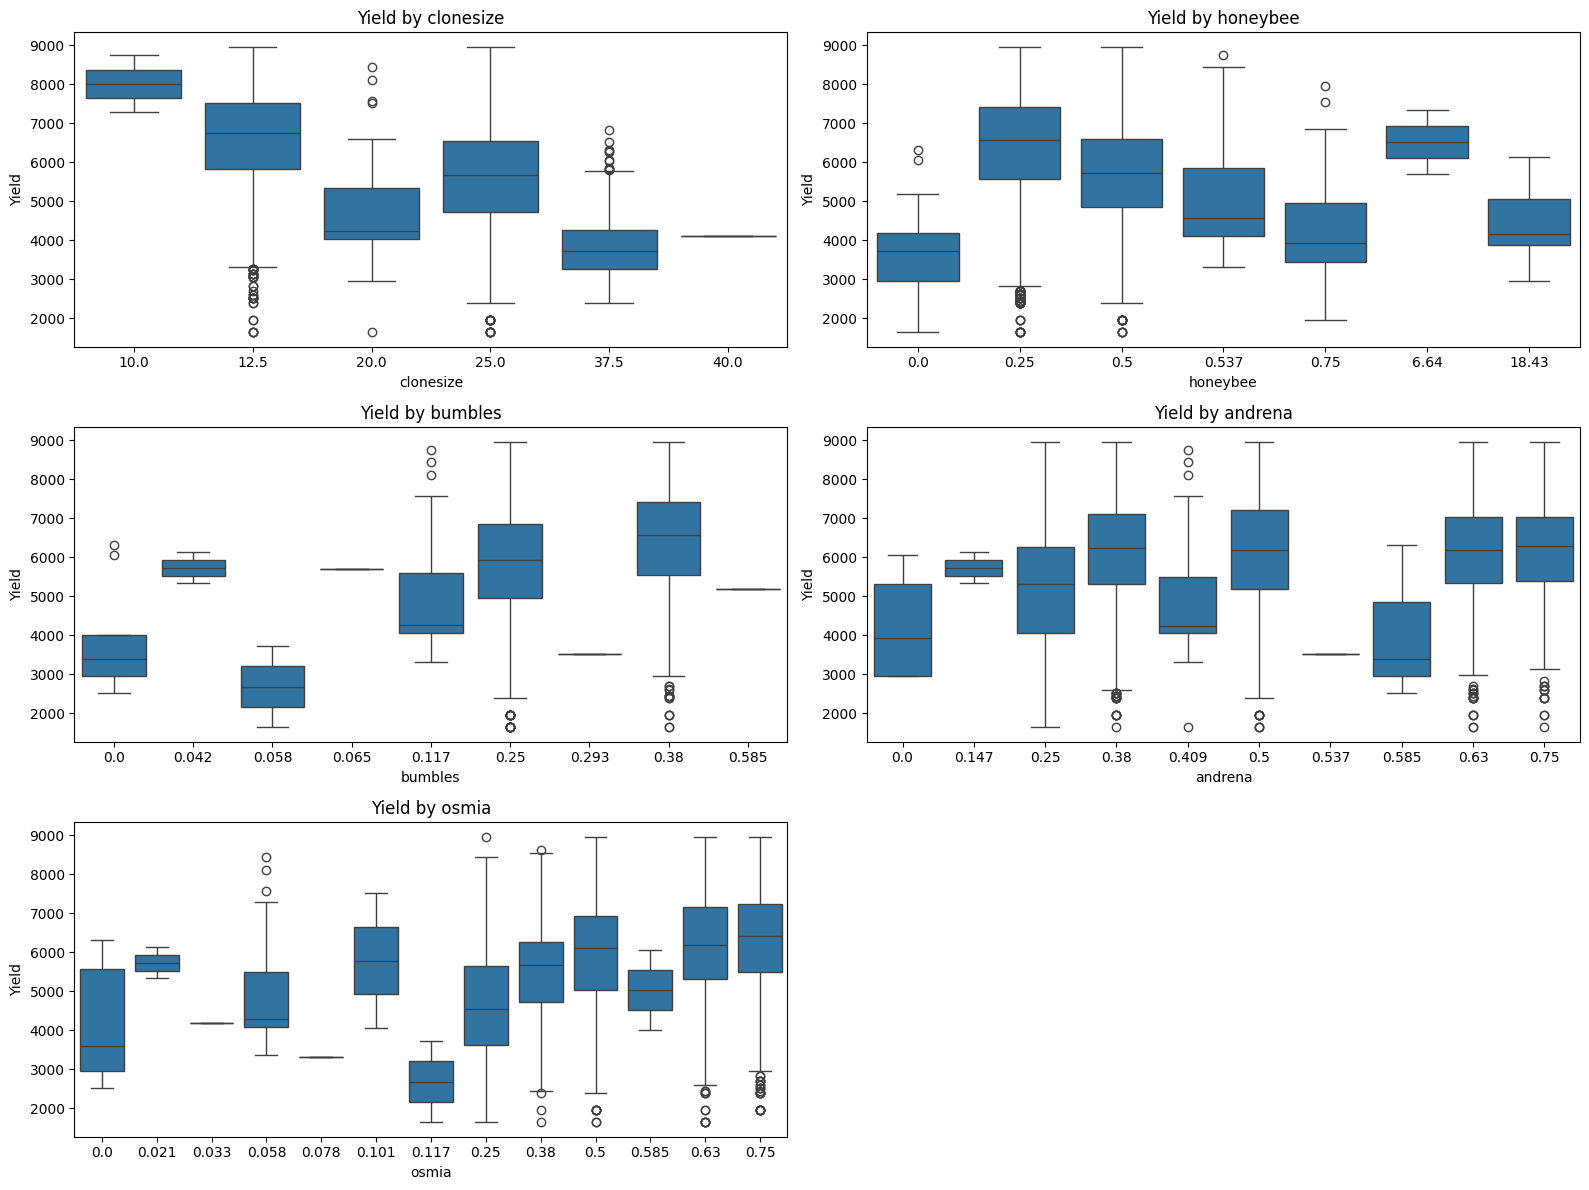

In [184]:
categorical_features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']  # Modify as needed
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=train_df[feature], y=train_df[target_column])
    plt.title(f"{target_column.capitalize()} by {feature}")
    plt.xlabel(feature)
    plt.ylabel(target_column.capitalize())
plt.tight_layout()
plt.show()


Ushbu kod `yield` va `categorical_features` ro‘yxatidagi har bir xususiyat o‘rtasidagi munosabatni ko‘rsatish uchun **boxplot** lar yaratadi. Har bir grafikda `yield` qiymatlarining turli kategorik xususiyatlar (masalan, `clonesize`, `honeybee`) darajalari bo‘yicha taqsimoti tasvirlanadi.

### Maqsad:
- `yield`ning har bir kategorik xususiyat darajalariga qarab qanday o‘zgarishini aniqlashga yordam beradi.
- `yield`ning ushbu kategoriyalar bo‘yicha qanday farqlanishini ko‘rsatadi, bu esa qaysi xususiyatlar `yield`ga sezilarli ta’sir ko‘rsatishi mumkinligini ko‘rsatadi.

Boxplotlar `yield`ning har bir kategorik daraja bo‘yicha o‘zgaruvchanligini va median qiymatlarini baholash imkonini beradi.

### Distribution of Categorical-like Features

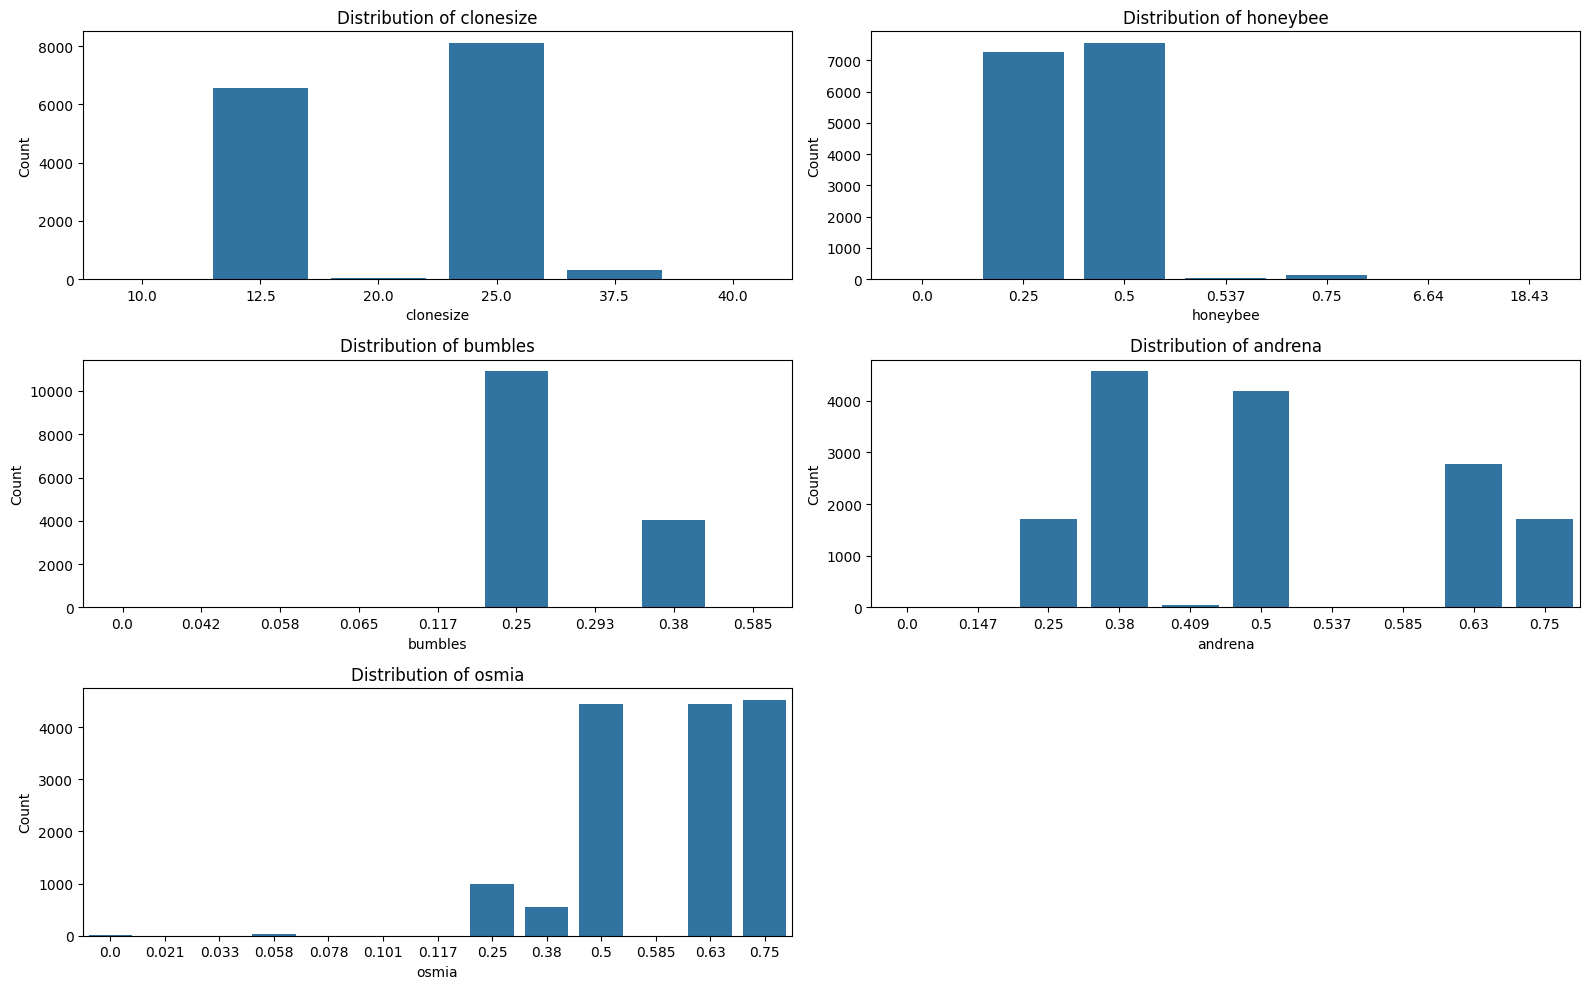

In [185]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=train_df[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

Ushbu kod `categorical_features` ro‘yxatidagi har bir xususiyat uchun **countplot** (sanoq grafiklari) yaratadi va har bir xususiyatdagi kategoriyalarning taqsimotini ko‘rsatadi.

### Maqsad:
- Har bir xususiyatdagi (masalan, `clonesize`, `honeybee`) kategoriyalar qanchalik tez-tez uchrashini vizual ko‘rsatadi.
- Muayyan kategoriyalar ko‘proq yoki kamroq uchrashi mumkinligini aniqlashga yordam beradi, bu esa `yield` va modelning ishlashiga ta’sir qilishi mumkin.

Ushbu grafiklar kategoriyalarning taqsimotini tezkor ko‘rib chiqishga yordam beradi va xususiyatlarning balansini va o‘zgaruvchanligini baholashni osonlashtiradi.

### Feature Engineering - Interaction and Transformation

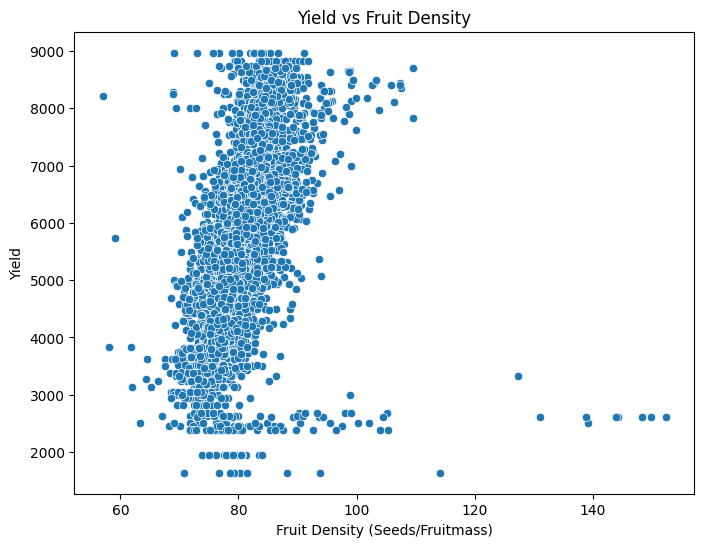

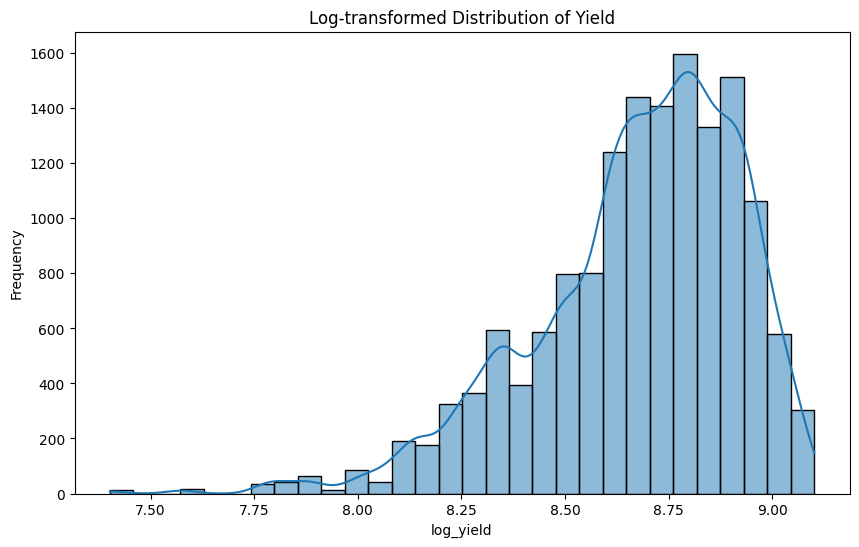

In [186]:
if 'seeds' in train_df.columns and 'fruitmass' in train_df.columns:
    train_df['fruit_density'] = train_df['seeds'] / train_df['fruitmass']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_df['fruit_density'], y=train_df[target_column])
    plt.title(f"{target_column.capitalize()} vs Fruit Density")
    plt.xlabel("Fruit Density (Seeds/Fruitmass)")
    plt.ylabel(target_column.capitalize())
    plt.show()

train_df[f'log_{target_column}'] = np.log1p(train_df[target_column])
plt.figure(figsize=(10, 6))
sns.histplot(train_df[f'log_{target_column}'], kde=True, bins=30)
plt.title(f"Log-transformed Distribution of {target_column.capitalize()}")
plt.xlabel(f"log_{target_column}")
plt.ylabel("Frequency")
plt.show()

Ushbu kod ikkita asosiy transformatsiyani bajaradi:

1. **Meva Zichligini Hisoblash**:
   - `seeds`ni `fruitmass`ga bo‘lib, yangi `fruit_density` xususiyatini yaratadi va uning `yield` bilan bog‘liqligini scatter grafika orqali ko‘rsatadi.
   
   **Maqsad**: `yield`ni urug‘ zichligi bilan qanday bog‘liqligini aniqlash va yangi xususiyat qo‘shish orqali modelni yaxshilash.

2. **Logarifmik Transformatsiya**:
   - `yield` uchun logarifmik transformatsiyani qo‘llaydi (`log_yield`), bu qiyshiqlikni kamaytiradi.
   - Logarifmik transformatsiyalangan taqsimotni ko‘rib chiqadi.

   **Maqsad**: `yield`ning qiyshiqligini kamaytirish, bu esa model ishlashini yaxshilashi mumkin.

Bu transformatsiyalar xususiyatlarni boyitadi va maqsadli taqsimotni modellash uchun qulayroq qiladi.

### Binning for Interpretability

In [187]:
if 'clonesize' in train_df.columns:
    train_df['clonesize_binned'] = pd.cut(train_df['clonesize'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Moderate', 'High', 'Very High'])
if 'honeybee' in train_df.columns:
    train_df['honeybee_binned'] = pd.cut(train_df['honeybee'], bins=[-0.1, 0.25, 0.5, 1, 18.43], labels=['Very Low', 'Low', 'Moderate', 'High'])
if 'osmia' in train_df.columns:
    train_df['osmia_binned'] = pd.cut(train_df['osmia'], bins=[-0.1, 0.25, 0.5, 0.75], labels=['Low', 'Moderate', 'High'])


Ushbu kod ba’zi xususiyatlarni tushunarli bo‘lishi uchun **kategoriyalarga ajratadi**:

1. **Clonesize Binlash**:
   - `clonesize` qiymatlari belgilangan oralig‘iga qarab to‘rt kategoriya: 'Low', 'Moderate', 'High' va 'Very High'ga ajratiladi.
   
2. **Honeybee Binlash**:
   - `honeybee` qiymatlari 'Very Low', 'Low', 'Moderate' va 'High' kategoriyalariga bo‘linadi.

3. **Osmia Binlash**:
   - `osmia` qiymatlari 'Low', 'Moderate' va 'High' kategoriyalariga ajratiladi.

**Maqsad**: Bu xususiyatlarni uzluksiz qiymatlar o‘rniga kategoriyalarga ajratish orqali ularning maqsadli o‘zgaruvchiga ta’sirini tushunishni osonlashtiradi.

In [188]:
print("\nEDA haqida umumiy xulosalar")
print(train_df[['fruit_density', f'log_{target_column}', 'clonesize_binned', 'honeybee_binned', 'osmia_binned']].head())



EDA haqida umumiy xulosalar
   fruit_density  log_yield clonesize_binned honeybee_binned osmia_binned
0      80.303966   8.712774         Moderate        Very Low         High
1      78.255998   7.988857             High        Very Low          Low
2      83.363309   8.580037             High             Low         High
3      82.200329   8.725516             High             Low         High
4      79.792771   8.852783         Moderate        Very Low         High


### Interaction Features

Seeds va clonesize o‘rtasidagi o‘zaro munosabat


In [189]:
if 'seeds' in train_df.columns and 'clonesize' in train_df.columns:
    train_df['seeds_clonesize_interaction'] = train_df['seeds'] * train_df['clonesize']


Fruitmass va osmia o‘rtasidagi o‘zaro munosabat

In [190]:
if 'fruitmass' in train_df.columns and 'osmia' in train_df.columns:
    train_df['fruitmass_osmia_interaction'] = train_df['fruitmass'] * train_df['osmia']


### Polynomial Features

Polinomli terminlarni qo‘shish xususiyatlar orasidagi no-chiziqli bog‘liqliklarni aniqlashga yordam beradi:

In [191]:
if 'clonesize' in train_df.columns:
    train_df['clonesize_squared'] = train_df['clonesize'] ** 2
if 'honeybee' in train_df.columns:
    train_df['honeybee_squared'] = train_df['honeybee'] ** 2

### Aggregation Features

O‘xshash xususiyatlarning umumiy statistikasi hisoblanib, ularni qo‘shish foydali ma’lumotlarni beradi:

1. Yuqori harorat diapazonlarining o‘rtacha qiymati

In [192]:
if 'MaxOfUpperTRange' in train_df.columns and 'MinOfUpperTRange' in train_df.columns:
    train_df['Avg_UpperTRange'] = (train_df['MaxOfUpperTRange'] + train_df['MinOfUpperTRange']) / 2


2. Pastki harorat diapazonlarining o‘rtacha qiymati


In [193]:
if 'MaxOfLowerTRange' in train_df.columns and 'MinOfLowerTRange' in train_df.columns:
    train_df['Avg_LowerTRange'] = (train_df['MaxOfLowerTRange'] + train_df['MinOfLowerTRange']) / 2


### Ratios and Density Features

Bu turdagi xususiyatlar o‘zaro nisbatlar asosida qiymatlarni o‘rganishga yordam beradi:

1. Fruitmassdagi seeds zichligi (agar hali yaratilmagan bo'lsa)


In [194]:
if 'seeds' in train_df.columns and 'fruitmass' in train_df.columns:
    train_df['seeds_density'] = train_df['seeds'] / train_df['fruitmass']


2. Raining Days va Average Raining Days o‘rtasidagi nisbat


In [195]:
if 'RainingDays' in train_df.columns and 'AverageRainingDays' in train_df.columns:
    train_df['rain_ratio'] = train_df['RainingDays'] / (train_df['AverageRainingDays'] + 1)  # Nolga bo‘linishni oldini olish uchun 1 qo‘shildi



### Log Transformation for Highly Skewed Features

Logarifmik transformatsiya ma’lumotlarning qiyshiqligini kamaytirib, ma’lumotlarni ba’zi modellar uchun qulayroq qiladi:

1. Qiyshiqlikka ega uzluksiz xususiyatlar uchun logarifmik transformatsiya


In [196]:
skewed_features = ['fruitmass', 'seeds', 'RainingDays']
for feature in skewed_features:
    if feature in train_df.columns:
        train_df[f'log_{feature}'] = np.log1p(train_df[feature])  # np.log1p nol qiymatlar bilan ishlaydi


### Binning for Grouping Numerical Features

Sonli xususiyatlarni kategoriyalarga ajratish ularning ta’sirini tushunishni osonlashtiradi:

1. Clonesize ni kategoriyalarga ajratish (masalan, agar age mavjud bo'lsa)


In [197]:
if 'clonesize' in train_df.columns:
    train_df['clonesize_bins'] = pd.cut(train_df['clonesize'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Moderate', 'High', 'Very High'])


### Xulosa


Ushbu qadamlar xususiyatlarning boyligini oshiradi, murakkab bog‘liqliklarni aniqlash va ma’lumotlarni modellashtirish uchun qulayroq qiladi. Qo‘shimcha ma’lumot yoki qo‘shimcha qadamlar haqida bilmoqchi bo‘lsangiz, xabar bering.

In [198]:
import pandas as pd
import numpy as np
import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import optuna

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and target
target_column = 'yield'
X = train_data.drop(columns=['id', target_column])
y = train_data[target_column]
X_test = test_data.drop(columns=['id'])

# Feature Engineering: Adding interaction terms, ratios, log transformations, and polynomial features
if 'seeds' in X.columns and 'fruitmass' in X.columns:
    X['fruit_density'] = X['seeds'] / X['fruitmass']
    X_test['fruit_density'] = X_test['seeds'] / X_test['fruitmass']

if 'clonesize' in X.columns and 'seeds' in X.columns:
    X['seeds_clonesize_interaction'] = X['seeds'] * X['clonesize']
    X_test['seeds_clonesize_interaction'] = X_test['seeds'] * X_test['clonesize']

# Log transformation for skewed features
for col in ['fruitmass', 'seeds', 'RainingDays']:
    if col in X.columns:
        X[f'log_{col}'] = np.log1p(X[col])
        X_test[f'log_{col}'] = np.log1p(X_test[col])

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X = pd.concat([X.reset_index(drop=True), X_poly_df], axis=1)

X_test_poly = poly.transform(X_test)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test.columns))
X_test = pd.concat([X_test.reset_index(drop=True), X_test_poly_df], axis=1)

# Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_reduced = pca.fit_transform(X)
X_test_reduced = pca.transform(X_test)

# Define Optuna objective function for hyperparameter tuning
def objective(trial):
    # Define hyperparameters for each model
    enet_alpha = trial.suggest_float('enet_alpha', 1e-4, 1.0, log=True)
    enet_l1_ratio = trial.suggest_float('enet_l1_ratio', 0.1, 0.9)
    svr_C = trial.suggest_float('svr_C', 0.1, 100.0, log=True)
    svr_epsilon = trial.suggest_float('svr_epsilon', 0.01, 1.0, log=True)
    knn_neighbors = trial.suggest_int('knn_neighbors', 5, 20)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 100, 500)
    rf_max_depth = trial.suggest_int('rf_max_depth', 5, 30)
    
    # Define base estimators with optimized parameters
    estimators = [
        ('ridge', Ridge(alpha=1.0)),
        ('lasso', Lasso(alpha=0.1)),
        ('enet', ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1_ratio, max_iter=10000)),
        ('svr', SVR(C=svr_C, epsilon=svr_epsilon, kernel='rbf')),
        ('knn', KNeighborsRegressor(n_neighbors=knn_neighbors)),
        ('rf', RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42, n_jobs=-1))
    ]
    
    # Voting Regressor for blending
    voting_model = VotingRegressor(
        estimators=estimators,
        weights=[1, 1, 1, 1, 1, 1]  # Equal weighting for all models
    )
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', voting_model)
    ])
    
    # Cross-validation for MAE scoring
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = cross_val_score(pipeline, X_reduced, y, cv=cv, scoring=make_scorer(mean_absolute_error), n_jobs=-1)
    return np.mean(mae_scores)

# Optimize model using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Retrieve the best parameters and model
best_trial = study.best_trial
logger.info(f"Best trial params: {best_trial.params}")
logger.info(f"Best MAE: {best_trial.value:.2f}")

# Extract the best hyperparameters
enet_alpha = best_trial.params['enet_alpha']
enet_l1_ratio = best_trial.params['enet_l1_ratio']
svr_C = best_trial.params['svr_C']
svr_epsilon = best_trial.params['svr_epsilon']
knn_neighbors = best_trial.params['knn_neighbors']
rf_n_estimators = best_trial.params['rf_n_estimators']
rf_max_depth = best_trial.params['rf_max_depth']

# Final estimators with best params
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.1)),
    ('enet', ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1_ratio, max_iter=10000)),
    ('svr', SVR(C=svr_C, epsilon=svr_epsilon, kernel='rbf')),
    ('knn', KNeighborsRegressor(n_neighbors=knn_neighbors)),
    ('rf', RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42, n_jobs=-1))
]

# Final voting regressor model
final_model = VotingRegressor(
    estimators=estimators,
    weights=[1, 1, 1, 1, 1, 1]
)

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', final_model)
])

# Fit the final model pipeline on the entire training data
final_pipeline.fit(X_reduced, y)
logger.info("Final model retrained on the entire training dataset.")

# Make predictions on the test set
y_test_pred = final_pipeline.predict(X_test_reduced)
logger.info("Predictions made on the test set.")

# Create submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'yield': y_test_pred
})

# Save submission
submission.to_csv('submission_voting_regression.csv', index=False)
logger.info("Submission file saved as 'submission_voting_regression.csv'")


[I 2024-11-10 07:01:07,930] A new study created in memory with name: no-name-6b9268d1-6ecd-43c0-bae0-71fac5c5ba15
[I 2024-11-10 07:01:22,823] Trial 0 finished with value: 788.4814841837128 and parameters: {'enet_alpha': 0.038048081793914036, 'enet_l1_ratio': 0.5315455709848432, 'svr_C': 0.3188380303856317, 'svr_epsilon': 0.6214708513695496, 'knn_neighbors': 7, 'rf_n_estimators': 265, 'rf_max_depth': 13}. Best is trial 0 with value: 788.4814841837128.
[I 2024-11-10 07:01:43,075] Trial 1 finished with value: 793.863988085734 and parameters: {'enet_alpha': 0.5658538256479431, 'enet_l1_ratio': 0.4159943720115151, 'svr_C': 0.1571449426279134, 'svr_epsilon': 0.5411792683286939, 'knn_neighbors': 14, 'rf_n_estimators': 455, 'rf_max_depth': 28}. Best is trial 0 with value: 788.4814841837128.
[I 2024-11-10 07:02:03,177] Trial 2 finished with value: 785.0832371281491 and parameters: {'enet_alpha': 0.14887450375092773, 'enet_l1_ratio': 0.8180097699294409, 'svr_C': 0.45249980579270976, 'svr_epsilon

In [ ]:
import pandas as pd
import numpy as np
import logging
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.feature_selection import RFE
import optuna

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and target
target_column = 'yield'
X = train_data.drop(columns=['id', target_column])
y = train_data[target_column]
X_test = test_data.drop(columns=['id'])

# Feature Engineering: Adding interaction terms, ratios, and log transformations
if 'seeds' in X.columns and 'fruitmass' in X.columns:
    X['fruit_density'] = X['seeds'] / (X['fruitmass'] + 1e-3)
    X_test['fruit_density'] = X_test['seeds'] / (X_test['fruitmass'] + 1e-3)

if 'clonesize' in X.columns and 'seeds' in X.columns:
    X['seeds_clonesize_interaction'] = X['seeds'] * X['clonesize']
    X_test['seeds_clonesize_interaction'] = X_test['seeds'] * X_test['clonesize']

# Log transformation for skewed features
for col in ['fruitmass', 'seeds', 'RainingDays']:
    if col in X.columns:
        X[f'log_{col}'] = np.log1p(X[col])
        X_test[f'log_{col}'] = np.log1p(X_test[col])

# Polynomial Features for key features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
important_features = ['fruit_density', 'seeds_clonesize_interaction']
X_poly = poly_features.fit_transform(X[important_features])
X_poly_df = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(important_features))
X = pd.concat([X.reset_index(drop=True), X_poly_df], axis=1)

X_test_poly = poly_features.transform(X_test[important_features])
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_features.get_feature_names_out(important_features))
X_test = pd.concat([X_test.reset_index(drop=True), X_test_poly_df], axis=1)

# Recursive Feature Elimination (RFE) with Ridge to select most predictive features
rfe_model = Ridge(alpha=1.0)
rfe = RFE(estimator=rfe_model, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)
X_test_rfe = rfe.transform(X_test)

# Define Optuna objective function for hyperparameter tuning
def objective(trial):
    # ElasticNet parameters
    enet_alpha = trial.suggest_float('enet_alpha', 1e-4, 1.0, log=True)
    enet_l1_ratio = trial.suggest_float('enet_l1_ratio', 0.1, 0.9)
    
    # SVR parameters
    svr_C = trial.suggest_float('svr_C', 0.1, 100.0, log=True)
    svr_epsilon = trial.suggest_float('svr_epsilon', 0.01, 1.0, log=True)
    
    # KNN parameters
    knn_neighbors = trial.suggest_int('knn_neighbors', 5, 20)

    # Decision Tree parameters
    dt_max_depth = trial.suggest_int('dt_max_depth', 5, 30)
    dt_min_samples_split = trial.suggest_int('dt_min_samples_split', 2, 10)
    
    # Random Forest parameters
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 200)
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 50)

    # Define models with tuned parameters
    estimators = [
        ('ridge', Ridge(alpha=1.0)),
        ('lasso', Lasso(alpha=0.1)),
        ('enet', ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1_ratio, max_iter=10000)),
        ('svr', SVR(C=svr_C, epsilon=svr_epsilon, kernel='rbf')),
        ('knn', KNeighborsRegressor(n_neighbors=knn_neighbors)),
        ('dt', DecisionTreeRegressor(max_depth=dt_max_depth, min_samples_split=dt_min_samples_split)),
        ('rf', RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42))
    ]
    
    # Voting Regressor for blending
    voting_model = VotingRegressor(estimators=estimators)
    
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  # Use RobustScaler to reduce outlier impact
        ('model', voting_model)
    ])
    
    # Cross-validation for MAE scoring
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    mae_scores = cross_val_score(pipeline, X_rfe, y, cv=cv, scoring=make_scorer(mean_absolute_error), n_jobs=-1)
    return np.mean(mae_scores)

# Optimize model using Optuna with Bayesian Optimization
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)

# Retrieve the best parameters and model
best_trial = study.best_trial
print(f"Best trial params: {best_trial.params}")
print(f"Best MAE: {best_trial.value:.2f}")

# Extract the best hyperparameters
enet_alpha = best_trial.params['enet_alpha']
enet_l1_ratio = best_trial.params['enet_l1_ratio']
svr_C = best_trial.params['svr_C']
svr_epsilon = best_trial.params['svr_epsilon']
knn_neighbors = best_trial.params['knn_neighbors']
dt_max_depth = best_trial.params['dt_max_depth']
dt_min_samples_split = best_trial.params['dt_min_samples_split']
rf_n_estimators = best_trial.params['rf_n_estimators']
rf_max_depth = best_trial.params['rf_max_depth']

# Final estimators with best params
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.1)),
    ('enet', ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1_ratio, max_iter=10000)),
    ('svr', SVR(C=svr_C, epsilon=svr_epsilon, kernel='rbf')),
    ('knn', KNeighborsRegressor(n_neighbors=knn_neighbors)),
    ('dt', DecisionTreeRegressor(max_depth=dt_max_depth, min_samples_split=dt_min_samples_split)),
    ('rf', RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42))
]

# Combined Voting and Stacking models
voting_reg = VotingRegressor(estimators=estimators)
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=1.0))

# Cross-validation and evaluation for Voting and Stacking
voting_mae = cross_val_score(Pipeline([('scaler', RobustScaler()), ('model', voting_reg)]), X_rfe, y, scoring=make_scorer(mean_absolute_error), cv=KFold(5)).mean()
stacking_mae = cross_val_score(Pipeline([('scaler', RobustScaler()), ('model', stacking_reg)]), X_rfe, y, scoring=make_scorer(mean_absolute_error), cv=KFold(5)).mean()

print(f"Voting Regressor MAE: {voting_mae}")
print(f"Stacking Regressor MAE: {stacking_mae}")

# Select the model with lower MAE for final predictions
if voting_mae < stacking_mae:
    print("Using Voting Regressor for final predictions.")
    final_model = Pipeline([('scaler', RobustScaler()), ('model', voting_reg)])
else:
    print("Using Stacking Regressor for final predictions.")
    final_model = Pipeline([('scaler', RobustScaler()), ('model', stacking_reg)])

# Fit the selected model on the entire training set
final_model.fit(X_rfe, y)

# Predict on the test set
y_test_pred = final_model.predict(X_test_rfe)

# Create submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'yield': y_test_pred
})
submission.to_csv('submission_advanced_model11.csv', index=False)
print("Submission file saved as 'submission_advanced_model11.csv'")


[I 2024-11-10 08:04:51,944] A new study created in memory with name: no-name-b099da12-a773-4959-bea0-b8e6f7eadf3b
[I 2024-11-10 08:06:41,228] Trial 0 finished with value: 262.4274758648793 and parameters: {'enet_alpha': 0.09750657005339326, 'enet_l1_ratio': 0.31333976361145677, 'svr_C': 33.456263073095094, 'svr_epsilon': 0.15155514554810717, 'knn_neighbors': 5, 'dt_max_depth': 13, 'dt_min_samples_split': 2, 'rf_n_estimators': 163, 'rf_max_depth': 26}. Best is trial 0 with value: 262.4274758648793.
[I 2024-11-10 08:07:38,917] Trial 1 finished with value: 267.25130648831134 and parameters: {'enet_alpha': 0.00011690659453102891, 'enet_l1_ratio': 0.34861998222260226, 'svr_C': 3.685807525238565, 'svr_epsilon': 0.9558400416044799, 'knn_neighbors': 19, 'dt_max_depth': 14, 'dt_min_samples_split': 5, 'rf_n_estimators': 68, 'rf_max_depth': 40}. Best is trial 0 with value: 262.4274758648793.
[I 2024-11-10 08:09:00,252] Trial 2 finished with value: 280.48056150979403 and parameters: {'enet_alpha':

Best trial params: {'enet_alpha': 0.00018359631244781885, 'enet_l1_ratio': 0.8034086659177208, 'svr_C': 23.940947207753133, 'svr_epsilon': 0.6442628024844241, 'knn_neighbors': 14, 'dt_max_depth': 12, 'dt_min_samples_split': 3, 'rf_n_estimators': 114, 'rf_max_depth': 44}
Best MAE: 260.17


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+08, tolerance: 2.235e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.915e+08, tolerance: 2.235e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 